# KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

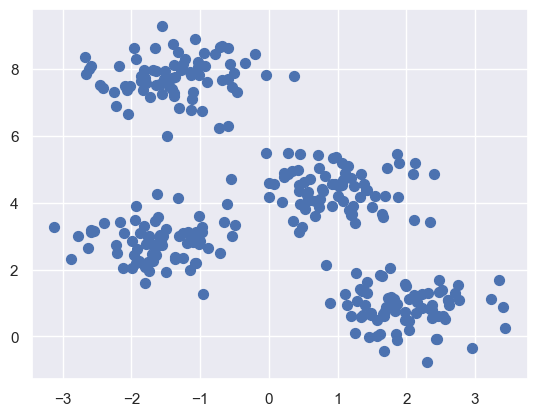

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [11]:
X.shape

(300, 2)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\narek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\narek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
y_kmeans

array([3, 1, 0, 1, 3, 3, 2, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 3, 2, 2, 3, 3,
       0, 2, 2, 0, 3, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 0, 2, 0, 0,
       2, 2, 1, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 3, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 0,
       1, 1, 0, 3, 1, 2, 2, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 3, 3, 0, 1, 0,
       2, 2, 3, 1, 3, 0, 1, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       3, 2, 1, 2, 3, 0, 1, 0, 0, 3, 0, 2, 2, 0, 3, 0, 0, 1, 3, 0, 2, 1,
       3, 3, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 0, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 3, 3, 0,
       1, 3, 3, 2, 3, 2, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 3, 2, 1, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 2, 1, 0, 2, 3, 0, 2, 2, 2, 3, 3, 1, 0, 0, 2, 3,
       1, 2, 0, 1, 0, 3, 3, 2, 2, 0, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3,
       1, 2, 1, 0, 3, 3, 1, 1, 1, 3, 3, 0, 1, 2])

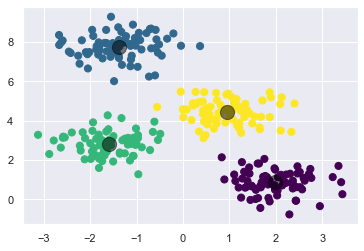

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [25]:
# Initialize yourself

In [36]:
class MyKMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(len(X), self.k,replace=False)] # fix me
        if self.method == 'k-means++':
            # your code here
            pass
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if np.all(new_centroids == self.centroids): # fix me
                break
            self.centroids = new_centroids

            
    def expectation(self, X, centroids):
        # your code here
        clusters=[]
        for x in X:
            clusters.append(np.argmin(np.linalg.norm(centroids-x, axis=1)))
        return np.array(clusters)

    def maximization(self, X, clusters):
        # your code here
        new_centroids=[]
        for i in range(self.k):
            new_centroids.append(np.mean(X[clusters==i], axis=0))
        return np.array(new_centroids)
        
    def predict(self, X):
        return self.expectation(X, self.centroids)

In [37]:
kmeans = MyKMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

(4, 2)
(4, 2)
(4, 2)


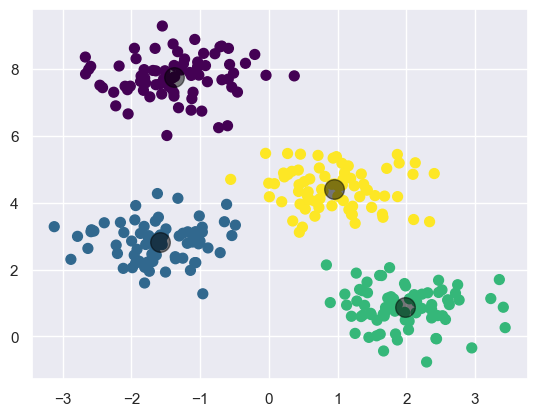

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);